In [1]:
import numpy as np
import pandas as pd

In [ ]:
# link to dataset https://yadi.sk/d/VBx_g7VnJA8xYA

In [2]:
df = pd.read_csv('./RGSMLCourseData/LCdata.csv', low_memory=False)
desc = pd.read_csv('./RGSMLCourseData/LCDataDictionary.csv')

In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Split
0,0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Train
1,1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Train
2,2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Train
3,3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Train
4,4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Train


In [7]:
pd.set_option('max_colwidth', 100)
desc

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
...,...,...
112,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income s..."
114,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
115,NaN,NaN


In [8]:
df.groupby('loan_status').size()

loan_status
Charged Off                                             268559
Current                                                 878317
Default                                                     40
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1076751
In Grace Period                                           8436
Late (16-30 days)                                         4349
Late (31-120 days)                                       21467
dtype: int64

In [9]:
df2 = df[df['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off',
                                 'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid'])]

In [11]:
df2.shape

(1348099, 153)

In [15]:
num_missing = df2.isnull().sum()
num_missing_cols = num_missing[num_missing < 0.05 * df2.shape[0]].index.tolist()

In [17]:
print(len(num_missing_cols))

69


In [19]:
df3 = df2[num_missing_cols].drop(['Unnamed: 0', 'id', 'url'], axis=1).copy()

In [20]:
y, X = df3['loan_status'], df3.drop('loan_status', axis=1)

In [23]:
y = y.map({'Fully Paid': 0, 'Charged Off': 1, 'Default': 1, 'Does not meet the credit policy. Status:Fully Paid': 0,
           'Does not meet the credit policy. Status:Charged Off': 1})

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X, _, y, _ = train_test_split(X, y, test_size=0.45, stratify=y)

In [28]:
X.shape, y.shape

((741454, 65), (741454,))

In [29]:
_df = pd.concat([X['Split'], y], axis=1)

In [31]:
_df.groupby('Split').sum()['loan_status']/_df.groupby('Split').size()

Split
Test     0.212076
Train    0.197340
dtype: float64

In [33]:
_df.groupby('Split').size()/_df.shape[0]

Split
Test     0.167466
Train    0.832534
dtype: float64

In [38]:
# X.select_dtypes(include='object')

In [44]:
x_train, y_train = X[X['Split'] == 'Train'].select_dtypes(exclude='object'), _df.loc[_df['Split'] == 'Train', 'loan_status']
x_test, y_test = X[X['Split'] == 'Test'].select_dtypes(exclude='object'), _df.loc[_df['Split'] == 'Test', 'loan_status']

In [45]:
y_train

1050470    0
226670     0
1872292    0
1754633    0
1869706    0
          ..
1888699    0
1781382    0
1142266    0
1082227    0
44466      0
Name: loan_status, Length: 617286, dtype: int64

In [46]:
import xgboost
import lightgbm
import catboost

In [ ]:
'category'

In [ ]:
xgboost.train(num_boost_rounds)
xgboost.cv()

In [ ]:
xgboost.DMatrix()

In [ ]:
lightgbm.Dataset()

In [ ]:
catboost.Pool()

In [72]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [53]:
from hyperopt import hp, fmin, tpe, space_eval, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

In [ ]:
cat_features = ['...', '...']

In [51]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [54]:
def objective_xgb(params):
    if 'max_depth' in params.keys():
        params['max_depth'] = int(params['max_depth'])
    xgb = XGBClassifier(objective='binary:logistic', n_estimators=10, tree_method='hist', n_jobs=1, **params)
    score = -np.mean(cross_val_score(xgb, x_train, y=y_train, cv=5, scoring='f1', n_jobs=-1))
    return {'loss': score, 'status': STATUS_OK}

In [116]:
space_xgboost = {'max_depth': hp.quniform('max_depth', 5, 12, 1),
                 'min_child_weight': hp.uniform('min_child_weight', 0, 50),
                 'subsample': hp.uniform('subsample', 0.5, 1),
                 'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                 'reg_alpha': hp.uniform('reg_alpha', 0, 1),
                 'reg_lambda': hp.uniform('reg_lambda', 0, 1),
                 'learning_rate': hp.uniform('learning_rate', 0.01, 1)}

In [58]:
trials = Trials()
best = fmin(objective_xgb, space=space_xgboost, trials=trials, algo=tpe.suggest, max_evals=5, timeout=300)
best_params = space_eval(space_xgboost, best)
best_params

100%|██████████| 5/5 [01:09<00:00, 13.84s/trial, best loss: -0.9977501853233834]


{'colsample_bytree': 0.8381178752421123,
 'learning_rate': 0.8783842266116004,
 'max_depth': 11.0,
 'min_child_weight': 11.360810348538541,
 'reg_alpha': 0.18059990235705237,
 'reg_lambda': 0.408580219250672,
 'subsample': 0.9252981919022347}

In [59]:
best_params = {'colsample_bytree': 0.8381178752421123,
               'learning_rate': 0.8783842266116004,
               'max_depth': 11,
               'min_child_weight': 11.360810348538541,
               'reg_alpha': 0.18059990235705237,
               'reg_lambda': 0.408580219250672,
               'subsample': 0.9252981919022347}

In [60]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=10, tree_method='hist', **best_params)

In [61]:
xgb.fit(x_train, y_train)

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8381178752421123, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.8783842266116004, max_delta_step=0, max_depth=11,
              min_child_weight=11.360810348538541, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=120,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0.18059990235705237, reg_lambda=0.408580219250672,
              scale_pos_weight=1, subsample=0.9252981919022347,
              tree_method='hist', validate_parameters=1, verbosity=None)

In [62]:
predict = xgb.predict(x_test)

In [63]:
print(f1_score(y_test, predict))
print(accuracy_score(y_test, predict))
print(precision_score(y_test, predict))
print(recall_score(y_test, predict))
print(roc_auc_score(y_test, predict))

0.9991258076776891
0.9996295341794987
1.0
0.9982531424448411
0.9991265712224205


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

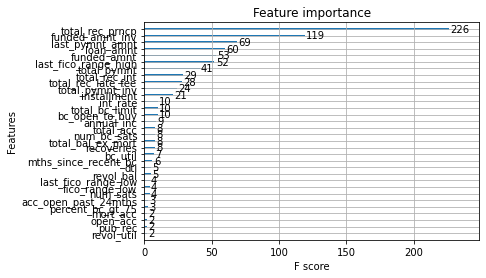

In [67]:
xgboost.plot_importance(xgb, importance_type='weight')

In [73]:
def objective_lgb(params):
    if 'num_leaves' in params.keys():
        params['num_leaves'] = int(params['num_leaves'])
    lgb = LGBMClassifier(objective='binary', n_estimators=10, boosting_type='goss', n_jobs=1, **params)
    score = -np.mean(cross_val_score(lgb, x_train, y=y_train, cv=5, scoring='f1', n_jobs=-1))
    return {'loss': score, 'status': STATUS_OK}

In [70]:
space_lightgbm = {'num_leaves': hp.quniform('num_leaves', 31, 200, 1),
                 'min_child_weight': hp.uniform('min_child_weight', 0, 50),
                 'subsample': hp.uniform('subsample', 0.5, 1),
                 'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                 'reg_alpha': hp.uniform('reg_alpha', 0, 1),
                 'reg_lambda': hp.uniform('reg_lambda', 0, 1),
                 'learning_rate': hp.uniform('learning_rate', 0.01, 1)}

In [145]:
df['is_date'] = pd.to_datetime(df['issue_d'])

In [149]:
df['p_date'] = pd.to_datetime(df['next_pymnt_d'])

In [151]:
(df['is_date'] - df['p_date']).dt.days

0             NaN
1             NaN
2             NaN
3         -1217.0
4             NaN
            ...  
2260663    -912.0
2260664    -912.0
2260665    -912.0
2260666       NaN
2260667    -912.0
Length: 2260668, dtype: float64

In [148]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'Split'],
      dtype='object')

In [74]:
trials = Trials()
best = fmin(objective_lgb, space=space_lightgbm, trials=trials, algo=tpe.suggest, max_evals=5, timeout=300)
best_params = space_eval(space_lightgbm, best)
best_params

100%|██████████| 5/5 [01:25<00:00, 17.01s/trial, best loss: -0.9966371229409742]


{'colsample_bytree': 0.793119077955948,
 'learning_rate': 0.996586045504841,
 'min_child_weight': 47.0742080200785,
 'num_leaves': 120.0,
 'reg_alpha': 0.0524006654296314,
 'reg_lambda': 0.13751818774348967,
 'subsample': 0.8284577399803252}

In [75]:
best_params = {'colsample_bytree': 0.793119077955948,
 'learning_rate': 0.996586045504841,
 'min_child_weight': 47.0742080200785,
 'num_leaves': 120,
 'reg_alpha': 0.0524006654296314,
 'reg_lambda': 0.13751818774348967,
 'subsample': 0.8284577399803252}

In [76]:
lgb = LGBMClassifier(objective='binary', n_estimators=10, boosting_type='goss', **best_params)

In [77]:
lgb.fit(x_train, y_train)
predict = lgb.predict(x_test)

In [78]:
print(f1_score(y_test, predict))
print(accuracy_score(y_test, predict))
print(precision_score(y_test, predict))
print(recall_score(y_test, predict))
print(roc_auc_score(y_test, predict))

0.9989927592694654
0.9995731589459442
0.9998858708057521
0.9981012417878707
0.9990352889575118


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

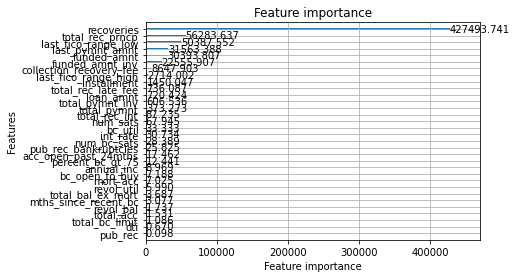

In [80]:
lightgbm.plot_importance(lgb, importance_type='gain')

In [81]:
def objective_ctb(params):
    ctb = CatBoostClassifier(objective='Logloss', n_estimators=10, silent=True, allow_writing_files=False, **params)
    score = -np.mean(cross_val_score(ctb, x_train, y=y_train, cv=5, scoring='f1', n_jobs=-1))
    return {'loss': score, 'status': STATUS_OK}

In [82]:
space_catboost = {"max_depth": hp.choice('max_depth', [5, 8, 10, 12, 15]),
                  "min_child_samples": hp.uniform('min_child_samples', 0, 50),
                  "subsample": hp.uniform('subsample', 0.5, 1),
                  "reg_lambda": hp.uniform('reg_lambda', 2, 30),
                  "learning_rate": hp.uniform('learning_rate', 0.01, 1)}

In [83]:
trials = Trials()
best = fmin(objective_ctb, space=space_catboost, algo=tpe.suggest, max_evals=5, timeout=300)
best_params = space_eval(space_catboost, best)
best_params

100%|██████████| 5/5 [03:16<00:00, 39.24s/trial, best loss: -0.9969464466697463]


{'learning_rate': 0.841077723713701,
 'max_depth': 15,
 'min_child_samples': 45.52303952566189,
 'reg_lambda': 4.620465525556865,
 'subsample': 0.8509240414647303}

In [84]:
ctb = CatBoostClassifier(objective='Logloss', n_estimators=10, silent=True, allow_writing_files=False, **best_params)
ctb.fit(x_train, y_train)
predict = ctb.predict(x_test)

In [85]:
print(f1_score(y_test, predict))
print(accuracy_score(y_test, predict))
print(precision_score(y_test, predict))
print(recall_score(y_test, predict))
print(roc_auc_score(y_test, predict))

0.999354029714633
0.9997261774370209
0.9999619786319912
0.9987468195799947
0.9993682991445229


In [86]:
feat_importance = pd.concat([pd.Series(ctb.feature_names_), pd.Series(ctb.get_feature_importance())], axis=1)
feat_importance.sort_values(1, ascending=False)

,0,1
23,recoveries,21.278690
25,last_pymnt_amnt,20.593528
20,total_rec_prncp,17.398722
1,funded_amnt,10.109690
2,funded_amnt_inv,6.813315
0,loan_amnt,3.628193
26,last_fico_range_high,3.009348
19,total_pymnt_inv,2.369179
27,last_fico_range_low,2.340021
24,collection_recovery_fee,1.883132


In [87]:
import shap

In [97]:
explainer = shap.TreeExplainer(xgb)

In [98]:
shap_values = explainer.shap_values(x_test.iloc[:1000])

In [99]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])

In [105]:
xgb.predict_proba(x_test)[0]

array([9.999317e-01, 6.833236e-05], dtype=float32)

In [108]:
1/(1+np.exp(-9.59))

0.9999315952579199

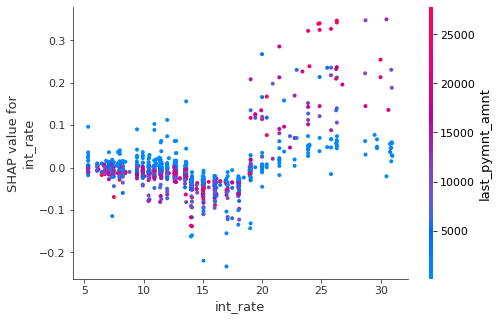

In [109]:
shap.dependence_plot('int_rate', shap_values, x_test.iloc[:1000])

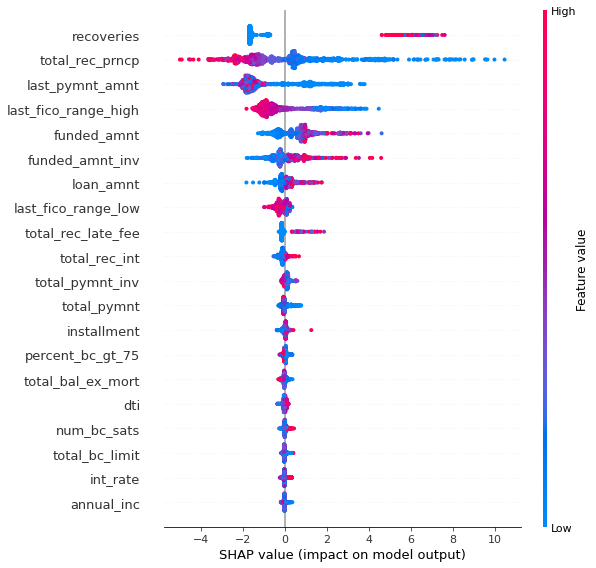

In [110]:
shap.summary_plot(shap_values, x_test.iloc[:1000])

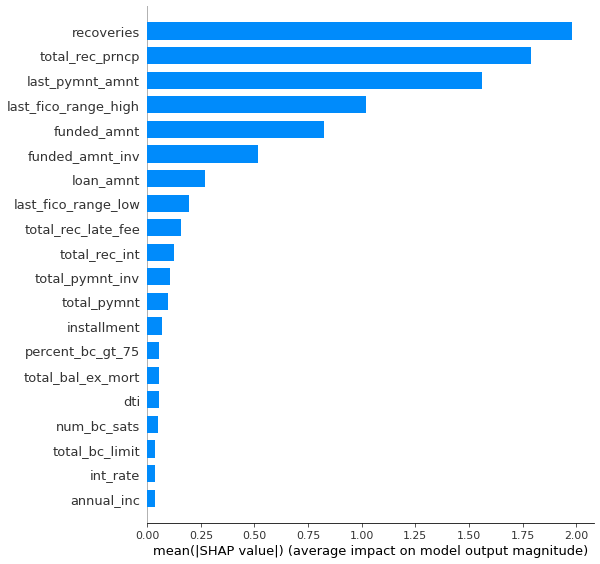

In [111]:
shap.summary_plot(shap_values, x_test.iloc[:1000], plot_type='bar')

In [113]:
desc[desc['LoanStatNew'] == 'recoveries']

,LoanStatNew,Description
89,recoveries,post charge off gross recovery


In [114]:
from insolver.wrappers import InsolverGBMWrapper

In [115]:
xgb = InsolverGBMWrapper(backend='xgboost', task='class', objective='binary', n_estimators=10, tree_method='hist')

In [117]:
xgb.hyperopt_cv(x_train, y_train, space_xgboost, max_evals=5, fn_params={'scoring': 'f1', 'maximize': True})

100%|██████████| 5/5 [01:46<00:00, 21.35s/trial, best loss: -0.9961044952544406]
[18:41:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.6779377920214311,
 'learning_rate': 0.8675116802786783,
 'max_depth': 8,
 'min_child_weight': 29.101088101377403,
 'reg_alpha': 0.45370588716030036,
 'reg_lambda': 0.011429454513415038,
 'subsample': 0.8312501562671373}

In [118]:
xgb.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
lgb = InsolverGBMWrapper(backend='lightgbm', task='class', objective='binary', n_estimators=10, boosting_type='goss')
lgb.hyperopt_cv(x_train, y_train, space_lightgbm, max_evals=5, fn_params={'scoring': 'f1', 'maximize': True})

100%|██████████| 5/5 [00:47<00:00,  9.58s/trial, best loss: -0.9967454381022269]


{'colsample_bytree': 0.7914560473927377,
 'learning_rate': 0.8027922451509483,
 'min_child_weight': 36.05802486504772,
 'num_leaves': 150,
 'reg_alpha': 0.2830478097881852,
 'reg_lambda': 0.799001442080837,
 'subsample': 0.9904584903253819}

In [120]:
lgb.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

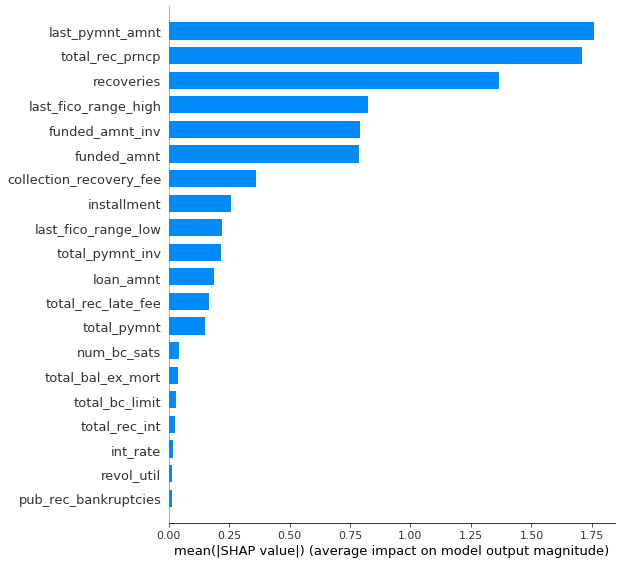

{'Intercept': [4.78328272444641, -4.78328272444641],
 'loan_amnt': -0.12899270288396028,
 'funded_amnt': -0.5480058567768757,
 'funded_amnt_inv': -0.4067268531186014,
 'int_rate': 0.0015782453100223201,
 'installment': -0.18800578059410317,
 'annual_inc': 0.0004620880028716572,
 'dti': 0.0,
 'delinq_2yrs': 0.0,
 'fico_range_low': 0.0,
 'fico_range_high': 0.0,
 'inq_last_6mths': 0.0,
 'open_acc': 0.0,
 'pub_rec': 0.00021290217742719387,
 'revol_bal': 0.0,
 'revol_util': -0.005855174242107521,
 'total_acc': -1.2905588651738074e-05,
 'out_prncp': 0.0,
 'out_prncp_inv': 0.0,
 'total_pymnt': -0.07840302147316994,
 'total_pymnt_inv': -0.07638947392008744,
 'total_rec_prncp': -0.18029446842458494,
 'total_rec_int': 0.017765747283967123,
 'total_rec_late_fee': 0.09673181653584831,
 'recoveries': 0.45391849125339945,
 'collection_recovery_fee': -0.010419942398110024,
 'last_pymnt_amnt': 1.1314204615464802,
 'last_fico_range_high': 0.11900260346870008,
 'last_fico_range_low': -0.0448090982150757

In [121]:
lgb.shap(x_test.iloc[:1000], plot=True)

In [124]:
def logit(x):
    return 1/(1+x)

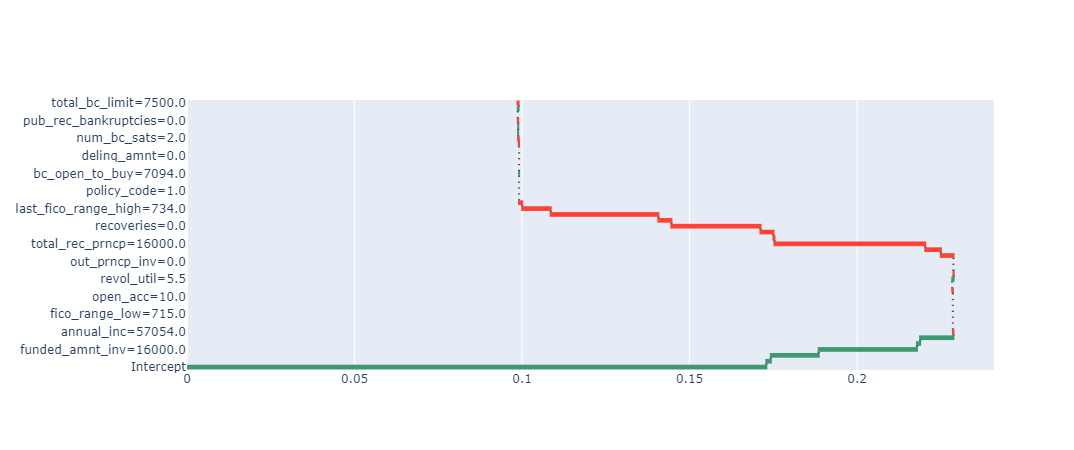

In [125]:
lgb.shap_explain(x_test.iloc[:1000], index=2112209, link=logit, show=True)

In [128]:
from insolver.model_tools import ModelMetricsCompare
from insolver.wrappers import InsolverTrivialWrapper

In [137]:
trivial = InsolverTrivialWrapper(col_name='loan_amnt')

In [138]:
trivial.fit(x_train, y_train)

In [139]:
trivial.predict(x_test)

array([0.20656173, 0.14570127, 0.14570127, ..., 0.15536723, 0.20656173,
       0.14797262])

In [133]:
ModelMetricsCompare(x_test, y_test, source=[xgb, lgb], metrics=[f1_score, accuracy_score, precision_score, recall_score, roc_auc_score])

Model comparison statistics:


,Mean,Variance,St. Dev.,Min,Q1,Median,Q3,Max
Actual,0.212076,0.167100,0.408778,0,0.0,0.0,0.0,1
GBM Xgboost,0.211600,0.166826,0.408443,0,0.0,0.0,0.0,1
GBM Lightgbm,0.211592,0.166821,0.408437,0,0.0,0.0,0.0,1



Models comparison metrics:


,f1 score,accuracy score,precision score,recall score,roc auc score
GBM Xgboost,0.998878,0.999525,1.000000,0.997759,0.998880
GBM Lightgbm,0.998821,0.999501,0.999962,0.997684,0.998837
